In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from pydataset import data

In [2]:
import acquire
import prepare

# Exercises

#### 1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [4]:
df = acquire.get_titanic_data()

Found CSV


In [5]:
df = prepare.prep_titanic(df)

In [6]:
train, validate, test = prepare.split_function(df, 'survived')

In [10]:
print(train.shape)
print(validate.shape)
print(test.shape)

(534, 12)
(178, 12)
(179, 12)


#### 2. Evaluate your results using the model score, confusion matrix, and classification report.



#### 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



#### 4. Run through steps 1-3 setting k to 10



#### 5. Run through steps 1-3 setting k to 20



#### 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



#### 7. Which model performs best on our out-of-sample data from validate?

In [12]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


In [11]:
def KNN_accuracy(train, validate, test, target_variable, drop_cols):
    """
    input target_variable as string
    drop_cols formatted as: ['col1', 'col2', 'etc'] for multiple columns
    """

    baseline_accuracy = train[target_variable].value_counts().max() / train[target_variable].value_counts().sum()
    print(f'Baseline Accuracy: {baseline_accuracy:.2%}')
    
    X_train = train.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_validate = validate.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    X_test = test.select_dtypes(exclude=['object']).drop(columns=[target_variable]).drop(columns=drop_cols)
    
    y_train = train[target_variable]
    y_validate = validate[target_variable]
    y_test = test[target_variable]
    
    knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    plot_confusion_matrix(knn, X_train, y_train)
    print(classification_report(y_train, y_pred))
    TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel()
    
    all_ = (TP + TN + FP + FN)
    
    accuracy = (TP + TN) / all_
    print(f"Accuracy: {accuracy}\n")
    
    TPR = recall = TP / (TP + FN)
    FPR = FP / (FP + TN)
    print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
    print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
    
    TNR = TN / (FP + TN)
    FNR = FN / (FN + TP)
    print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
    print(f"False Negative Rate/Miss Rate: {FNR}\n")
    
    precision =  TP / (TP + FP)
    f1 =  2 * ((precision * recall) / ( precision + recall))
    print(f"Precision/PPV: {precision}")
    print(f"F1 Score: {f1}\n")
    
    support_pos = TP + FN
    support_neg = FP + TN
    print(f"Support (0): {support_pos}")
    print(f"Support (1): {support_neg}")
    
    scores_all = []
    for x in range(1,21):
        knn = KNeighborsClassifier(n_neighbors=x, weights='uniform')
        knn.fit(X_train, y_train)
        train_acc = knn.score(X_train, y_train)
        val_acc = knn.score(X_validate, y_validate)
        
        scores_all.append([x, train_acc, val_acc])
    
    
    scores_df = pd.DataFrame(scores_all, columns=['n_neighbors', 'train_acc', 'val_acc'])
    scores_df['difference'] = scores_df.train_acc - scores_df.val_acc
    
    
    
    plt.figure(figsize=(12,6))
    plt.plot(scores_df.n_neighbors, scores_df.train_acc, label='train', marker='o')
    plt.plot(scores_df.n_neighbors, scores_df.val_acc, label='validate', marker='o')
    plt.xlabel('n_neighbors')
    plt.ylabel('accuracy')
    
    plt.title('how does the accuracy change with number of neighbors on train and validate?')
    plt.legend()
    plt.show()
    print(f'You can print scores_df for numbers assosiated with graph.')
  

Baseline Accuracy: 61.61%
Confusion Matrix:
[[280  49]
 [ 50 155]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       329
           1       0.76      0.76      0.76       205

    accuracy                           0.81       534
   macro avg       0.80      0.80      0.80       534
weighted avg       0.81      0.81      0.81       534

Accuracy: 0.8146067415730337

True Positive Rate/Sensitivity/Recall/Power: 0.7560975609756098
False Positive Rate/False Alarm Ratio/Fall-out: 0.14893617021276595
True Negative Rate/Specificity/Selectivity: 0.851063829787234
False Negative Rate/Miss Rate: 0.24390243902439024

Precision/PPV: 0.7598039215686274
F1 Score: 0.7579462102689486

Support (0): 205
Support (1): 329


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/

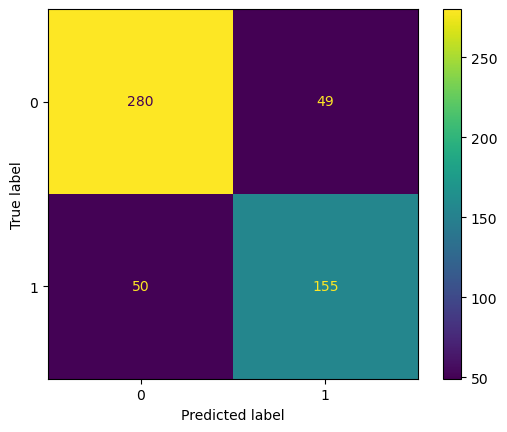

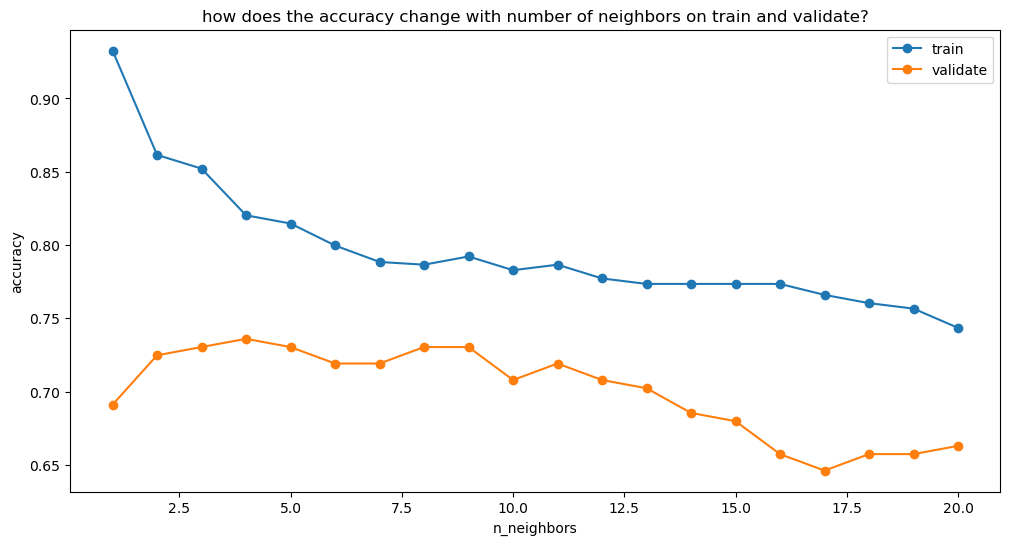

You can print scores_df for numbers assosiated with graph.


In [15]:
KNN_accuracy(train, validate, test, 'survived', 'passenger_id')